In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,NaN,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          501 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286216,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701600,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
# import matplotlib.pyplot as plt

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

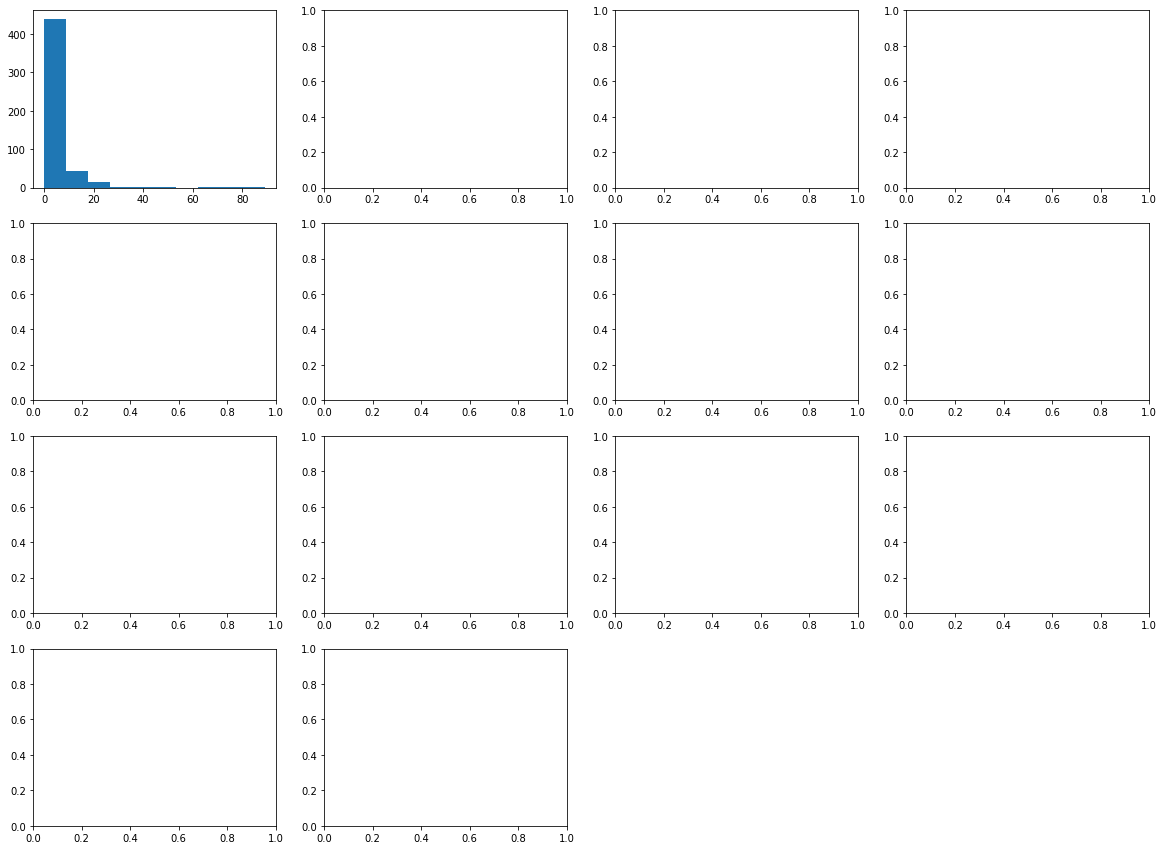

In [10]:
# housing.hist(bin=30,figsize=(20,15))

## train test function

In [ ]:
import numpy as np
def train_test_split(data,test_ratio):
    np.random.seed(42) ## saves the state of randomness
    shuffled =np.random.permutation(len(data))
    test_set_size =int(len(data) * test_ratio)
    test_data_indicies=shuffled[:test_set_size]
    traing_data_indicies =shuffled[test_set_size:]
    return data.iloc[traing_data_indicies] ,data.iloc[test_data_indicies]

In [ ]:
# train_set,test_set = train_test_split(housing,0.2)
# print("train len =>",len(train_set),"  Test len ==>",len(test_set))

# ### Using test train split function from Scikit learn module

In [ ]:

# from sklearn.model_selection import train_test_split
# train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
# print("train len =>",len(train_set),"  Test len ==>",len(test_set))

## stratify Shuffel split

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_set,test_set in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_set]
    strat_test_set  = housing.loc[test_set]

In [52]:
print(strat_train_set)

     CRIM          ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254     0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348     0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476     4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321     0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326     0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   
..          ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
155     3.53501   0.0  19.58     1  0.871  6.152  82.6  1.7455    5  403   
423     7.05042   0.0  18.10     0  0.614  6.103  85.1  2.0218   24  666   
98      0.08187   0.0   2.89     0  0.445  7.820  36.9  3.4952    2  276   
455     4.75237   0.0  18.10     0  0.713  6.525  86.5  2.4358   24  666   
216     0.04560   0.0  13.89     1  0.550  5.888  56.0  3.1121    5  276   

     PTRATIO       B  LSTAT  MEDV  
254     16.4  392.89   6.57  21.9  
348     17.0  3

In [ ]:
print(strat_test_set)

 # After cellNo. In[38]  (Dealing with Missing  values with sklearn)

In [ ]:
housing = strat_train_set.copy()
housing

## Correlation 

In [ ]:
strat_train_setcorr_matrix = housing.corr()

In [ ]:
corr_matrix["MEDV"].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

## pointing out the Outliers plots

In [ ]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.5)

In [ ]:
housing['TXRM']= housing['TAX']/housing['RM']

In [ ]:
housing.head()

In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending= False)

In [ ]:
housing.plot(kind='scatter',x='MEDV',y='TXRM',alpha=0.5)

# Missing Attributes

### There are three options  to deal  with missing attributes in database
###  1- Delete the data points where the attributes are missing 
###  2- Delete the whole row (Which has missing data points) if the correlation is minimum
###  3- Replace the missing cells with 0 , Medain OR Mean

In [36]:
housing_missing = pd.DataFrame(housing,columns=housing.columns) # Same housing data But with some missing RM values
housing_missing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          501 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [37]:
housing_missing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286216,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701600,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
# Option -1  

option1 = housing_missing.dropna(subset='RM')
option1.shape   #Note that original dataframe is unchanged

(501, 14)

In [39]:
# Option -2 
option2= housing_missing.drop("RM",axis=1) 
option2     #Note that original dataframe is unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [40]:
# Option -3
median = housing_missing['RM'].median()
mean =   housing_missing['RM'].mean()
housing_missing['RM'].fillna(median) #Note that original dataframe is unchanged


0      6.209
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.209
Name: RM, Length: 506, dtype: float64

In [41]:
housing_missing.info()   #Checcking if the original data is changed or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          501 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Dealing with Missing  values with sklearn

#### NOTE : everything we did above There is class in sklearn with the hel of them we can deal with missingvalues

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")  
imputer.fit(housing_missing)


SimpleImputer()

In [43]:
imputer.statistics_

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28621557e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01, 2.25328063e+01])

In [44]:
X =imputer.transform(housing_missing)
housing_missing_tr =pd.DataFrame(X,columns=housing_missing.columns)
housing_missing_tr.describe()
housing_tr=housing_missing_tr.drop("MEDV",axis=1) #For my convenieance
housing_tr_labels =housing_missing_tr["MEDV"]

## Design of Sk-Learn
1. Estimators
2. Transformers
3. Predictors

## Features scaling - It is a technique in which all the features are conversed into a range
1.Min-Max scalling (Normalization) -    (value-min)/(max-min)
sklearn provides a class called MinMax scaler for this

2.Standardization - (value-mean)/std
sklearn provides a class called Standared Scaler  for this 

## Creating a pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


my_pipline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    #......add as many as u like
    ('std_scaler',StandardScaler())
])

In [46]:
housing_num_tr =my_pipline.fit_transform(housing_tr)


In [47]:
housing_num_tr.shape

(506, 13)

In [48]:
housing_tr_labels 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Select and train model

###  Selecting a desired model for The Boston Housing Data


In [53]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(housing_num_tr,housing_tr_labels)

LinearRegression()

In [54]:
some_data =strat_test_set.iloc[9:15].drop("MEDV",axis=1)
some_labels = strat_test_set.iloc[9:15]["MEDV"]
prepared_data =my_pipline.fit_transform(some_data)

some_labels

273    35.2
495    23.1
374    13.8
360    25.0
407    27.9
336    19.5
Name: MEDV, dtype: float64

In [55]:
model.predict(prepared_data)

array([38.14923295, 22.55769736, 10.13828219, 22.54082833, 21.34718424,
       20.46361287])

## Evaluating the Linear Regression model

In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse=mean_squared_error(some_labels,model.predict(prepared_data))
lin_rmse= np.sqrt(lin_mse)

In [121]:
lin_mse # Since We can see here the Mean Squared error is too large , we have to discard Linear regression model

57.84166666666667

In [122]:
#1 2 3 4 5 6 7 8 9 10

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_tr_labels,scoring="neg_mean_squared_error",cv=10)
rmse =np.sqrt(-scores)

In [123]:
rmse

array([ 3.47999887,  3.15115914,  4.04906186,  9.29551863,  4.14475809,
        7.87438139,  4.34078334, 11.10473773,  9.7809202 ,  4.31040601])

## Trying Decision Tree Regressor Model

In [112]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(housing_num_tr,housing_tr_labels)

DecisionTreeRegressor()

## Evaliating Decision Tree Regressor model

In [113]:
some_data =housing_num_tr
some_labels = housing_tr_labels
prepared_data =my_pipline.fit_transform(some_data)

some_labels

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [114]:
pre=model.predict(prepared_data)

In [115]:
mse=mean_squared_error(some_labels,model.predict(prepared_data))
rmse= np.sqrt(lin_mse)

In [116]:
mse # here 0.0 means the data is over fitted

0.0

## Using better Evaluation technique - Using Cross validation

In [119]:
#1 2 3 4 5 6 7 8 9 10

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_tr_labels,scoring="neg_mean_squared_error",cv=10)
rmse =np.sqrt(-scores)

In [120]:
rmse

array([ 3.77530677,  3.19727212,  4.3408005 ,  7.28268158,  4.13590211,
        6.14855315,  4.33783356, 11.12633812,  7.58464238,  5.34799028])